# Chapter 1 — The Machine Learning Landscape: Summary

Ringkasan dan contoh kode singkat yang menampilkan konsep-konsep utama dari Bab 1. Notebook ini menggunakan dataset sintetis untuk mencontohkan pelatihan model regresi linier dan k-Nearest Neighbors, sehingga tidak memerlukan file CSV eksternal.

## Apa itu Machine Learning?
Machine Learning adalah seni dan ilmu membuat program komputer yang dapat meningkatkan kinerjanya pada suatu tugas melalui pengalaman (data), tanpa harus diprogram secara eksplisit untuk setiap skenario. Alih-alih menulis aturan secara manual, sistem ML belajar pola dari contoh dan kemudian membuat prediksi atau keputusan pada data baru.

## Mengapa Menggunakan Machine Learning?
ML berguna ketika masalah terlalu rumit untuk diuraikan menjadi aturan eksplisit, ketika lingkungan berubah terus-menerus, atau ketika kita ingin menggali insight dari data besar. Contoh nyata termasuk spam filter, pengenalan suara, rekomendasi produk, dan deteksi anomali.

## Tipe-Tipe Pembelajaran
Sistem ML dikategorikan menurut pengawasan dan cara belajar: supervised (dengan label), unsupervised (tanpa label), semisupervised (campuran), dan reinforcement learning (agen yang belajar dari reward). Selain itu ada pembelajaran batch vs online, serta instance-based vs model-based generalization.

## Tantangan Utama
Beberapa tantangan utama adalah data yang tidak representatif, kuantitas data yang tidak cukup, data berkualitas rendah (noise dan outlier), serta memilih model yang tepat. Dua masalah klasik adalah overfitting (model terlalu kompleks sehingga tidak generalisasi) dan underfitting (model terlalu sederhana sehingga tidak menangkap pola).

## Evaluasi dan Validasi
Untuk mengetahui performa pada data baru, biasanya dataset dibagi menjadi training, validation, dan test. Teknik seperti cross-validation membantu memilih hyperparameter dan model agar tidak menyesuaikan diri terlalu kuat terhadap test set.

---
## Contoh Kode: Regresi Linier vs k-NN (Data Sintetis)
Berikut contoh yang meniru contoh pada buku: kita membuat data sintetis GDP per kapita vs life satisfaction, melatih regresi linier dan k-NN, mem-plot, dan membandingkan prediksi untuk GDP Cyprus (22587).

In [1]:
# Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# For reproducibility
np.random.seed(42)

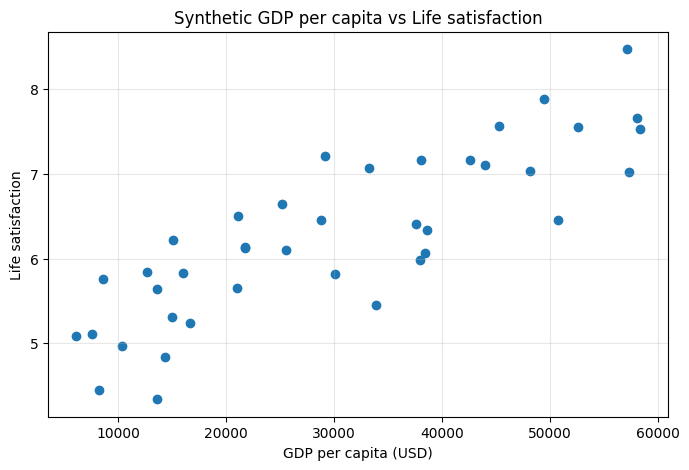

In [2]:
# Cell 2: Generate synthetic dataset that mimics GDP per capita vs Life satisfaction
n = 40
# GDP per capita in USD (randomly sampled between 5k and 60k)
X = np.random.uniform(5000, 60000, size=(n, 1))
# Create a roughly linear relation with noise
true_intercept = 4.85
true_slope = 4.91e-5
noise = np.random.normal(scale=0.6, size=(n, 1))
y = true_intercept + true_slope * X + noise

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='tab:blue')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Synthetic GDP per capita vs Life satisfaction')
plt.grid(alpha=0.3)
plt.show()

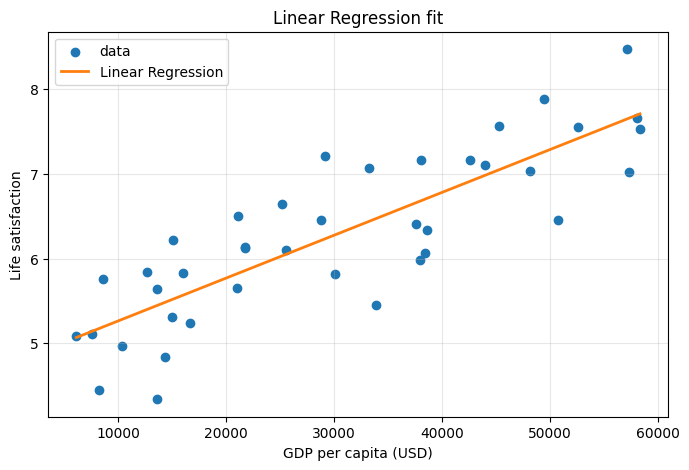

LinearRegression prediction for GDP=22587: 5.9010


In [3]:
# Cell 3: Train Linear Regression and plot fitted line; predict for Cyprus (22587)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Create a line for plotting
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = lin_reg.predict(X_line)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='tab:blue', label='data')
plt.plot(X_line, y_line, color='tab:orange', linewidth=2, label='Linear Regression')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Linear Regression fit')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Predict for Cyprus
cyprus_gdp = np.array([[22587]])
pred_lin = lin_reg.predict(cyprus_gdp)
print(f'LinearRegression prediction for GDP=22587: {pred_lin.flatten()[0]:.4f}')

In [4]:
# Cell 4: Train k-NN regressor (k=3) and compare predictions and MSE
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y.ravel())  # sklearn accepts 1D y for KNeighborsRegressor
pred_knn = knn.predict(cyprus_gdp)
print(f'KNeighborsRegressor (k=3) prediction for GDP=22587: {pred_knn.flatten()[0]:.4f}')

# Evaluate models on the training data (for demonstration)
y_pred_lin_train = lin_reg.predict(X)
y_pred_knn_train = knn.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin_train)
mse_knn = mean_squared_error(y, y_pred_knn_train)
print(f'MSE on training data — LinearRegression: {mse_lin:.4f}')
print(f'MSE on training data — KNN (k=3): {mse_knn:.4f}')

KNeighborsRegressor (k=3) prediction for GDP=22587: 6.2538
MSE on training data — LinearRegression: 0.2786
MSE on training data — KNN (k=3): 0.2568
